In [1]:
#Kmeans Clustering
'''
Perform Clustering(Hierarchical,Kmeans & DBSCAN)for the crime data and identify the number of clusters formed and draw inferences.

'''

'\nPerform Clustering(Hierarchical,Kmeans & DBSCAN)for the crime data and identify the number of clusters formed and draw inferences.\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
#Import Dataset

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

07/28/2023  07:06 PM    <DIR>          .
07/28/2023  12:05 PM    <DIR>          ..
07/28/2023  06:36 PM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
07/28/2023  06:31 PM            81,417 Airlines_DBSCAN.ipynb
07/28/2023  06:29 PM           159,225 Airlines_Hierarchical_clustering.ipynb
07/28/2023  06:33 PM           146,345 Airlines_Kmeans.ipynb
07/26/2023  06:03 PM         4,610,348 bank-full.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
04/15/2023  10:24 PM    <DIR>          Clustering
07/26/2023  05:55 PM         2,508,902 Corolla-MLR.ipynb
07/28/2023  04:49 PM             1,328 crime_data.csv
07/28/2023  07:06 PM           195,493 Crime_DBSCAN.ipynb
07/28/2023  07:06 PM           

In [5]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
#Missing Data

In [8]:
data.isnull()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [9]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [10]:
data[data.duplicated()] 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [11]:
#Renaming columns
data1=data.rename({'Unnamed: 0':'State'},axis=1)
data1.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


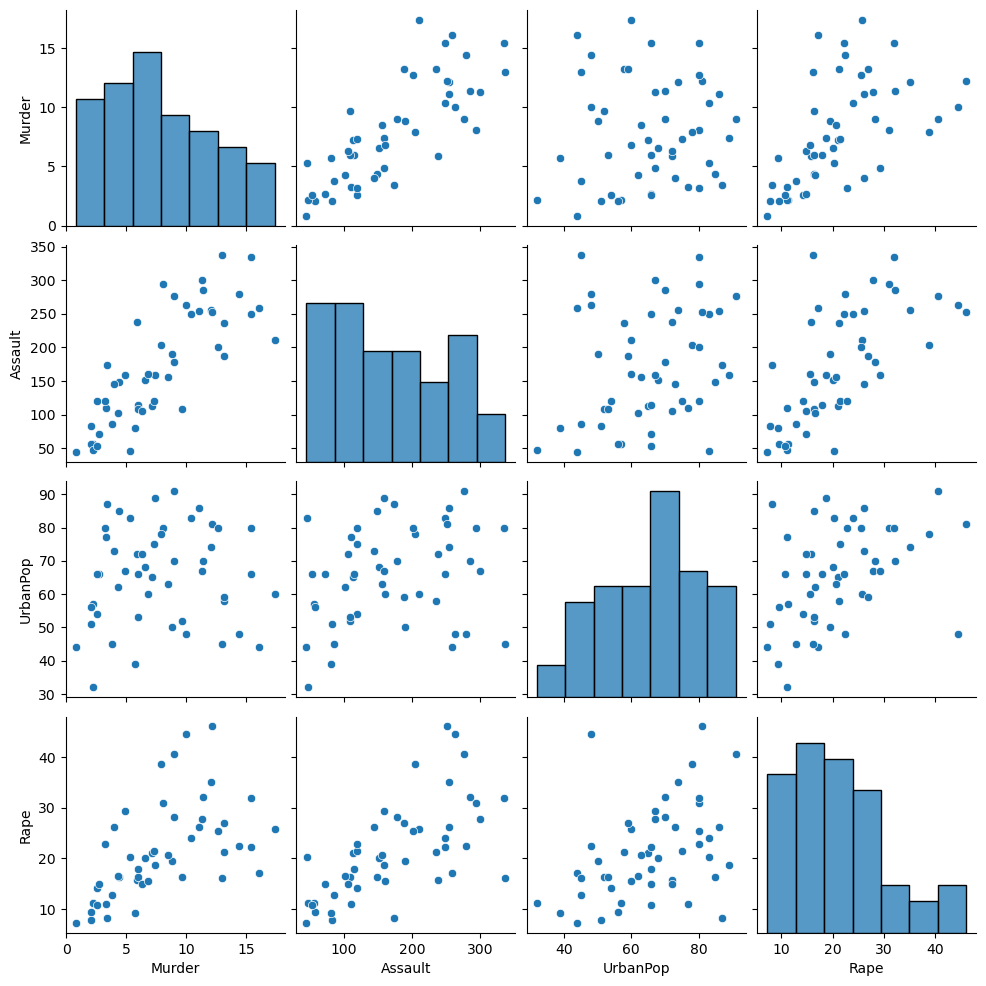

In [12]:
sns.pairplot(data1)
plt.show()

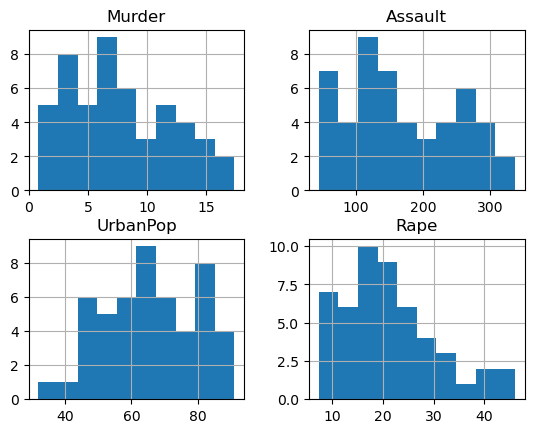

In [13]:
data1.hist()
plt.show()

In [14]:
data1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [15]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(data1.iloc[:,1:])

In [16]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


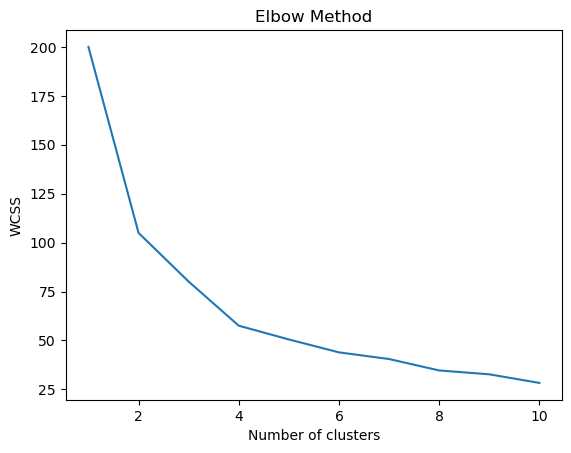

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=4, random_state=42)

In [19]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [20]:
#Assign clusters to the data set
data1['clusterid_new'] = clusters_new.labels_

In [21]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [22]:
data1.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_11240\2095256569.py:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data1.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


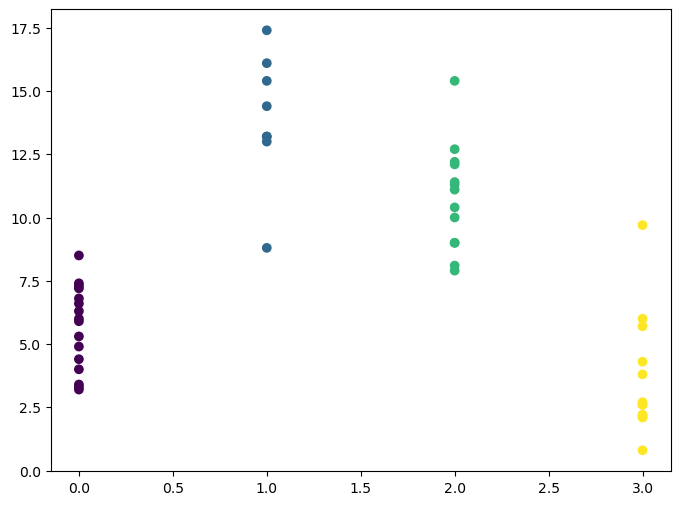

In [23]:
# Plot 
plt.figure(figsize=(8, 6))  
plt.scatter(data1['clusterid_new'],data1['Murder'], c=clusters_new.labels_) 
plt.show()